In [2]:
# 런타임 - GPU 로 했을때, gpu확인하는 방법.
!nvidia-smi

Tue Sep 15 00:35:40 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train_fashion,y_train_fashion),(x_test_fashion,y_test_fashion) = fashion_mnist.load_data()
# 픽셀값은 0~1 범위로 정규화 
x_train_fashion, x_test_fashion = x_train_fashion, x_test_fashion

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# 픽셀값은 0~1 범위로 정규화 
x_train, x_test = x_train/255.0, x_test/255.0

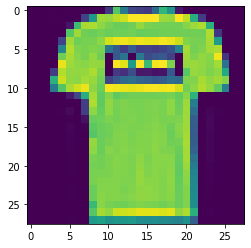

In [6]:
plt.imshow(x_train_fashion[1])

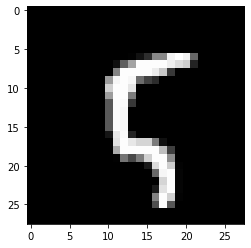

In [7]:
plt.imshow(x_train[100],cmap="gray")

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2978 - accuracy: 0.9125
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1456 - accuracy: 0.9561
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1074 - accuracy: 0.9666
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0872 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0750 - accuracy: 0.9761


##복사 붙여넣기 했던 코드 분석

In [19]:
# model = Sequential(
#     [
#      #layer가 들어가는 부분  ( 2 , 3 , 2 로 구현)
     
#      #layer1 , 0층 ,입력층
#      layers.Flatten(input_shape=(2,1)),
#      #layer2, 1층 3개의 노드
#      layers.Dense(3,use_bias=False),
#      #layer3, 2층. 출력층.
#      layers.Dense(2)
#     ]
# )
# model.build()

In [6]:
model = Sequential(
    [
     #layer가 들어가는 부분  ( 2 , 3 , 2 로 구현)
     
     #layer1 , 0층 ,입력층
     layers.Flatten(input_shape=(28,28)),
     #layer2, 1층 / 보통 units은 2의 제곱수를 사용 2,4,8,16...
     layers.Dense(128),
     #layer3, 2층. 출력층.
     # 클래스 분류이고, 원핫인코딩으로 인해 10개로 나온다.
     layers.Dense(10)
    ]
)
model.build()

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
# build는 단순히 build ?
# compile 은 optimizer , loss 값을 지정해서 빌드.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5) # 정답에 대해, 완독횟수를5회로 지정.


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3227 - accuracy: 0.1797
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1941
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1941
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1941
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.1941


위의 결과를 보면, 활성화함수를 사용안하면 학습이 안되는 현상을 확인할 수 있다.

In [9]:
model = Sequential(
    [
     #layer가 들어가는 부분  ( 2 , 3 , 2 로 구현)
     
     #layer1 , 0층 ,입력층
     layers.Flatten(input_shape=(28,28)),
     #layer2, 1층 / 보통 units은 2의 제곱수를 사용 2,4,8,16...
     layers.Dense(128,activation='relu'),
     #layer3, 2층. 출력층.
     # 클래스 분류이고, 원핫인코딩으로 인해 10개로 나온다.
     layers.Dense(10,activation='softmax')
    ]
)

In [10]:
# compile 함수 : 순환과정에 필요한 함수들을 적용시켜주는 함수.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2609 - accuracy: 0.9251
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1169 - accuracy: 0.9655
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0816 - accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0591 - accuracy: 0.9818
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0476 - accuracy: 0.9856


활성화 함수를 사용하니 , 모델이 학습이 된 것을 확인할 수 있다.

In [35]:
model(x_train[:3])

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[2.84051364e-14, 2.11391252e-10, 1.41001175e-08, 1.05856704e-02,
        1.65237121e-19, 9.89414334e-01, 2.88793207e-14, 8.84337581e-09,
        9.82281747e-13, 1.62699063e-10],
       [9.99767125e-01, 1.32624478e-09, 2.31834652e-04, 3.39979749e-07,
        4.67876606e-13, 5.76609196e-08, 5.71793407e-07, 4.19203561e-09,
        1.69389480e-08, 4.59500811e-08],
       [1.27407191e-07, 7.89308524e-06, 3.55458283e-03, 3.11933291e-05,
        9.94127154e-01, 1.39258731e-07, 3.92180624e-07, 2.40834357e-04,
        8.25504867e-06, 2.02943641e-03]], dtype=float32)>

CIFAR10 데이터 구분하기

In [11]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

170500096/170498071 [==============================] - 3s 0us/step


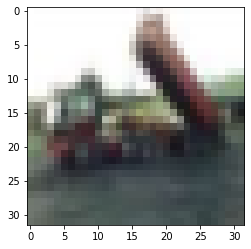

In [39]:
plt.imshow(x_train[2])

In [40]:
x_train.shape # 3은 rgb를 표현한것. 

(50000, 32, 32, 3)

In [12]:
model = Sequential(
    [
     #layer가 들어가는 부분  ( 2 , 3 , 2 로 구현)
     
     #layer1 , 0층 ,입력층
     layers.Flatten(input_shape=(32,32,3)),
     #layer2, 1층 / 보통 units은 2의 제곱수를 사용 2,4,8,16...
     layers.Dense(128,activation='relu'),
     #layer3, 2층. 출력층.
     # 클래스 분류이고, 원핫인코딩으로 인해 10개로 나온다.
     layers.Dense(10,activation='softmax')
    ]
)
# compile 함수 : 순환과정에 필요한 함수들을 적용시켜주는 함수.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)



Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9041 - accuracy: 0.3249
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7692 - accuracy: 0.3731
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7169 - accuracy: 0.3871
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6808 - accuracy: 0.3993
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6536 - accuracy: 0.4098


같은 코드인데 학습률이 현저히 떨어진다 
개선사항을 생각해보면
1. epochs 늘리기
2. dense 의 units수를 늘리기.

In [42]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [45]:
model = Sequential(
    [
     #layer가 들어가는 부분  ( 2 , 3 , 2 로 구현)
     
     #layer1 , 0층 ,입력층
     layers.Flatten(input_shape=(32,32,3)),
     #layer2, 1층 / 보통 units은 2의 제곱수를 사용 2,4,8,16...
     layers.Dense(512 ,activation='relu'),
     #layer3, 2층. 출력층.
     # 클래스 분류이고, 원핫인코딩으로 인해 10개로 나온다.
     layers.Dense(10,activation='softmax')
    ]
)
# compile 함수 : 순환과정에 필요한 함수들을 적용시켜주는 함수.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)


Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8696 - accuracy: 0.3341
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6905 - accuracy: 0.3941
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6352 - accuracy: 0.4164
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5997 - accuracy: 0.4319
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5672 - accuracy: 0.4422
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5455 - accuracy: 0.4517
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5226 - accuracy: 0.4598
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5045 - accuracy: 0.4641
Epoch 9/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4981 - accuracy: 0.4680
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.482

In [47]:
# 모델이 train데이터를 많이보면 많이 볼수록 격차는 커지게 된다.
# 왜냐면 overfit 되는경향이 있기 때문이다.

model.evaluate(x_test,y_test) # 모델한테 안보여준 데이터라 학률이 내려감을 볼 수 있다.

313/313 [==============================] - 1s 2ms/step - loss: 1.5411 - accuracy: 0.4579


[1.5410749912261963, 0.4578999876976013]